In [4]:
# imports here
import numpy as np   #for processing arrays
import pandas as pd  #for processing dataframes
import sqlite3 as sql  #SQL!
import matplotlib.pyplot as plt #picture making!
plt.style.use('fivethirtyeight') #A helpful style package

---
#### CS 260 Final Project - Fall 2022
---

# Pokemon: An Analysis of Strength and Realism Using Pokedex Data

### By: Lucas Acosta-Morales and Alexander Rodriguez


---

## 1. Introduction

For this project, our group explored a dataset containing statistics on the Pokemon video game characters up to the 8th generation (last updated October 2020). We asked two types of questions within our data set. The first three questions are concentrated on measures of a Pokemon's strength, while the last two are focused on a Pokemon's realism.

We concentrated on asking these questions.

1. For each Pokemon Type, what percent of Pokemon with that Type as its primary type have a damage multiplier against Bug Type Moves that is greater than 1?
1. For Pokemon whose Total Stat Points are in groups of 50 (0 - 50, 51 -100, …), how many have a catch rate less than the average for all Pokemon?
1. For pokemon in generation 5, as global number increases, does health follow an upward trend?
1. What is the correlation between speed and weight in kg?
1. For each Pokemon and dogs of similar height, what is the weight difference between them?

---

## 2. Data

A direct link to the data can be found at the following website. 
 * https://www.kaggle.com/datasets/mariotormo/complete-pokemon-dataset-updated-090420?datasetId=593561
 
According the website, the data was collected via scraping the websites "https://pokemondb.net/ (mostly everything) and https://www.serebii.net/ (information about sub-legendary, legendary and mythical pokemon)."

In [5]:
#load csv data into a db here
try:
    #Read in the needed csvs and create the DB
    pokemon = pd.read_csv('pokemon.csv')
    conn = sql.connect('pokemon.db')
    pokemon.to_sql('pokemon', conn,  index = False)

    dogs = pd.read_csv('dog_show.csv')
    dogs.to_sql('dogs', conn,  index = False)
except:
    
    print("Issue during DB creation/connection")

In [6]:
sql_statement = """SELECT * 
                   FROM pokemon;"""

pokemon = pd.read_sql_query(sql_statement, conn)
pokemon

,global_num,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,1040,896,Glastrier,Polaross,ブリザポス (Burizaposu),8,Sub Legendary,Wild Horse Pokémon,1,Ice,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1041,1041,897,Spectrier,Phantoross,レイスポス (Reisuposu),8,Sub Legendary,Swift Horse Pokémon,1,Ghost,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1042,1042,898,Calyrex,Coronospa,バドレックス (Budrex),8,Legendary,King Pokémon,2,Psychic,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1043,1043,898,Calyrex Ice Rider,Coronospa,バドレックス (Budrex),8,Legendary,High King Pokémon,2,Psychic,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


A direct link to the data can be found at the following website. 
 * https://www.kaggle.com/datasets/paultimothymooney/best-in-show-data-about-dogs
 
According the website, the data was collected via scraping the website https://informationisbeautiful.net/visualizations/best-in-show-whats-the-top-data-dog/

In [7]:
sql_statement = """SELECT * 
                   FROM dogs;"""

dogs = pd.read_sql_query(sql_statement, conn)
dogs

,dog_breed,category,size_category,weight_kg,weight_lbs,shoulder_height_cm,shoulder_height_in
0,Border Collie,herding,medium,no data,no data,51,20
1,Border Terrier,terrier,small,6,13.5,no data,no data
2,Brittany,sporting,medium,16,35,48,19
3,Cairn Terrier,terrier,small,6,14,25,10
4,Welsh Springer Spaniel,sporting,medium,no data,no data,46,18
...,...,...,...,...,...,...,...
169,Weimaraner,sporting,large,no data,no data,64,25
170,Welsh Terrier,terrier,small,9,20,38,15
171,Wire Fox Terrier,terrier,small,8,17.5,38,15
172,Wirehaired Pointing Griffon,sporting,medium,no data,no data,56,22


### 2.1 Variables Explained

The variables in the pokemon table are explained below.

* **global_num:** The unique identification number of each Pokemon including distinct forms
* **pokedex_number:** The entry number of the Pokemon in the National Pokedex
* **name:** The English name of the Pokemon
* **german_name:** The German name of the Pokemon
* **japanese_name:** The Original Japanese name of the Pokemon
* **generation:** The numbered generation which the Pokemon was first introduced
* **issublegendary:** Denotes if the Pokemon is sub-legendary
* **is_legendary:** Denotes if the Pokemon is legendary
* **is_mythical:** Denotes if the Pokemon is mythical
* **species:** The Categorie of the Pokemon
* **type_number:** Number of types that the Pokemon has
* **type_1:** The Primary Type of the Pokemon
* **type_2:** The Secondary Type of the Pokemon if it has it
* **height_m:** Height of the Pokemon in meters
* **weight_kg:** The Weight of the Pokemon in kilograms
* **abilities_number:** The number of abilities of the Pokemon
* **ability_?:** Name of the Pokemon abilities
* **ability_hidden:** Name of the hidden ability of the Pokemon if it has one
* **total_points:** Total number of Base Points
* **hp:** The Base HP of the Pokemon
* **attack:** The Base Attack of the Pokemon
* **defense:** The Base Defense of the Pokemon
* **sp_attack:** The Base Special Attack of the Pokemon
* **sp_defense:** The Base Special Defense of the Pokemon
* **speed:** The Base Speed of the Pokemon
* **catch_rate:** Catch Rate of the Pokemon
* **base_friendship:** The Base Friendship of the Pokemon
* **base_experience:** The Base experience of a wild Pokemon when caught
* **growth_rate:** The Growth Rate of the Pokemon
* **eggtypenumber:** Number of groups where a Pokemon can hatch
* **eggtype?:** Names of the egg groups where a Pokemon can hatch
* **percentage_male:** The percentage of the species that are male. Blank if the Pokemon is genderless.
* **egg_cycles:** The number of cycles (255-257 steps) required to hatch an egg of the Pokemon
* **against_normal:** Denotes the amount of damage taken against an attack of normal type
* **against_fire:** Denotes the amount of damage taken against an attack of fire type
* **against_water:** Denotes the amount of damage taken against an attack of water type
* **against_electric:** Denotes the amount of damage taken against an attack of electric type
* **against_grass:** Denotes the amount of damage taken against an attack of grass type
* **against_ice:** Denotes the amount of damage taken against an attack of ice type
* **against_fighting:** Denotes the amount of damage taken against an attack of fighting type
* **against_poison:** Denotes the amount of damage taken against an attack of poison type
* **against_ground:** Denotes the amount of damage taken against an attack of ground type
* **against_flying:** Denotes the amount of damage taken against an attack of flying type
* **against_psychic:** Denotes the amount of damage taken against an attack of psychic type
* **against_bug:** Denotes the amount of damage taken against an attack of bug type
* **against_rock:** Denotes the amount of damage taken against an attack of rock type
* **against_ghost:** Denotes the amount of damage taken against an attack of ghost type
* **against_dragon:** Denotes the amount of damage taken against an attack of dragon type
* **against_dark:** Denotes the amount of damage taken against an attack of dark type
* **against_steel:** Denotes the amount of damage taken against an attack of steel type
* **against_fairy:** Denotes the amount of damage taken against an attack of fairy type

The variables in the dogs table are explained below.

* **dog_breed:** The dog's particular breed. This column is unique.
* **category:** The dog's competition category
* **size_category:** The dog's size category (small, medium, or large)
* **weight_kg:** The dog's weight in kilograms
* **weight_lbs:** The dog's weight in pounds
* **shoulder_height_cm:** The shoulder height of the dog in centimeters
* **shoulder_height_in:** The shoulder height of the dog in inches


---

## 3. Analysis


### Q1:  For each Pokemon Type, what percent of Pokemon with that Type as its primary type have a damage multiplier against Bug Type Moves that is greater than 1?

Bug Type is often considered to be one of the weakest types of Pokemon, with many weaknesses and not many strengths. To evaluate this claim, we are looking at the offensive capabilities by considering how often Bug Type moves deal more damage than usual against Pokemon of other types.

In [8]:
#select statement here - removed by Dr. R

,type_1,percent_pokemon
0,Bug,9.876543
1,Dark,34.567901
2,Dragon,4.938272
3,Electric,3.703704
4,Fairy,0.000000
5,Fighting,0.000000
6,Fire,0.000000
7,Flying,0.000000
8,Ghost,0.000000
9,Grass,70.370370


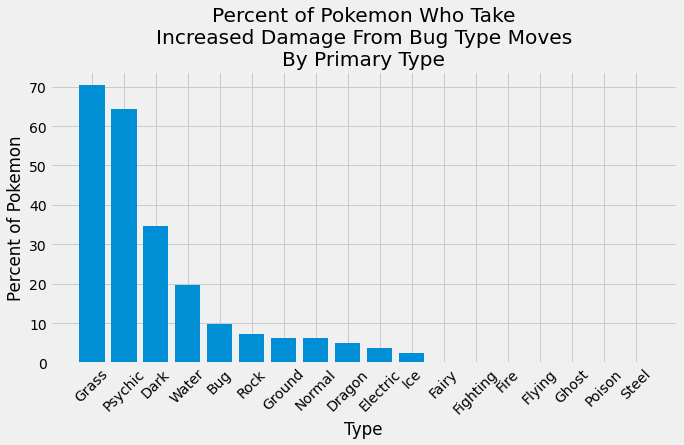

In [9]:
# Code for a visualization - removed by Dr. R

The data shows that most Grass and Psychic Type Pokemon take more damage than the usual amount. This is not surprising, as the Pokemon Type Chart (pictured below) shows that both Types have a built in weakeness to Bug Type. What is surprising to us is that although Dark Type also shares this weakness, less than half of Dark Type Pokemon take more damage than usual from Bug Type moves. We suspect this is due to the Pokemon's secondary type (type_2 in the dataset) typically resisting Bug Type moves and thus cancelling out the damage boost provided by Dark Type. These low numbers, even against types it should usually be successful against, leads us to conclude that Bug Type does in fact have poor offensive capabilities.

<img src='https://img.pokemondb.net/images/typechart.png'>

While the above picture helped us analyze Pokemon strength within a particular Type, we wanted to expand our analysis to work with all Pokemon in the dataset. This led us to ask a question related to the games' universal standard of power, stat points.

### Q2:  For Pokemon whose Total Stat Points are in groups of 50 (0 - 50, 51 -100, …), how many have a catch rate less than the average for all Pokemon?

In the Pokemon games, Total Stat Points are often an indicator of how powerful a Pokemon is. Powerful pokemon are also harder to catch, as indicated by a low catch rate. We think this data might vary between individual Pokemon, but still have a general upward trend, and so we are looking at groups of Pokemon denoted by 50 stat point increments. Note that catch rate can range from 0, meaning impossible to catch, to 255, meaning guaranteed to catch.

In [10]:
#select statement here - removed by Dr. R

,name,total_points
0,Eternatus Eternamax,1125


In [11]:
#select statement here - removed by Dr. R

,name,total_points
0,Wishiwashi Solo Form,175
1,Cosmog,200
2,Tyrogue,210
3,Wimpod,230
4,Shedinja,236
...,...,...
687,Primal Kyogre,770
688,Primal Groudon,770
689,Mega Mewtwo X,780
690,Mega Mewtwo Y,780


In [12]:
#select statement here - removed by Dr. R

,name,catch_rate,total_points
0,Sunkern,235.0,180
1,Blipbug,255.0,180
2,Snom,190.0,185
3,Azurill,150.0,190
4,Kricketot,255.0,194
...,...,...,...
330,Sandaconda,120.0,510
331,Mega Audino,255.0,545
332,Mega Camerupt,150.0,560
333,Necrozma,255.0,600


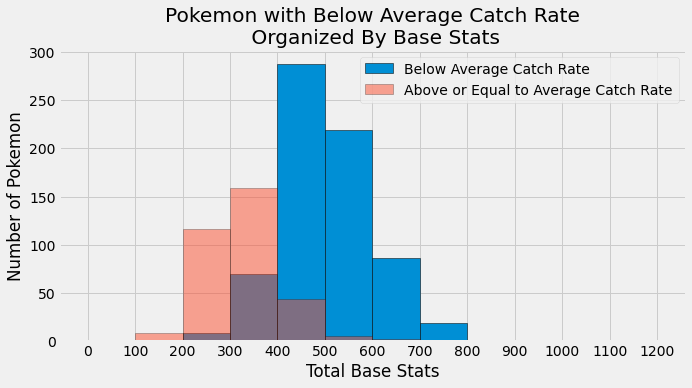

In [13]:
# Code for a visualization - removed by Dr. R

The data above confirms our suspicions; many of the Pokemon with below average catch rates have total base stats, while most of the Pokemon with high or average catch rates have low total stats. Out of curiostiy, we also looked to see which Pokemon were in the upper category that only had below average catch rates, meaning Pokemon with total stats of 600 or above.

In [14]:
#select statement here - removed by Dr. R

,name,catch_rate,total_points
0,Mega Alakazam,50.0,600
1,Mega Gengar,45.0,600
2,Mega Pinsir,45.0,600
3,Dragonite,45.0,600
4,Mew,45.0,600
...,...,...,...
100,Primal Kyogre,5.0,770
101,Primal Groudon,5.0,770
102,Mega Mewtwo X,3.0,780
103,Mega Mewtwo Y,3.0,780


The above table indicates that most of the Pokemon in this category are Legendary or Mythical Pokemon. This makes sense as these Pokemon are usually encountered at the end of each Pokemon game and serve as a kind of final boss fight before the credits roll. Rare pokemon forms known as Mega Evolutions are also in this category, which is interesting as these special forms cannot be caught in any Pokemon game, and can only be obtained through other means, and we thought that this would mean they would have a Null catch rate.

After addressing some of the measures of a Pokemon's power with regard to the general dataset, we wanted to shift focus and look at a Pokemon's power within the context of the game they are found in.

### Q3:  For pokemon in generation 5, as global number increases, does health follow an upward trend?

In each generation, Pokemon are sorted by a Pokedex Number. In the Pokemon games, players aim to see all Pokemon from that generation and complete their Pokedex, which means the Pokedex numbering often represents the order in which players encounter particular Pokemon. Since a game is supposed to get more difficult as the player progressess, we are hoping to see Pokemon health go up over the course of "time" as represented by pokedex number. We use health as the indicator of increasing challenge, as more powerful foes often have increased health.

In [15]:
#select statement here - removed by Dr. R

,global_num,hp
0,591,100
1,592,45
2,593,60
3,594,75
4,595,65
...,...,...
166,757,91
167,758,91
168,759,100
169,760,100


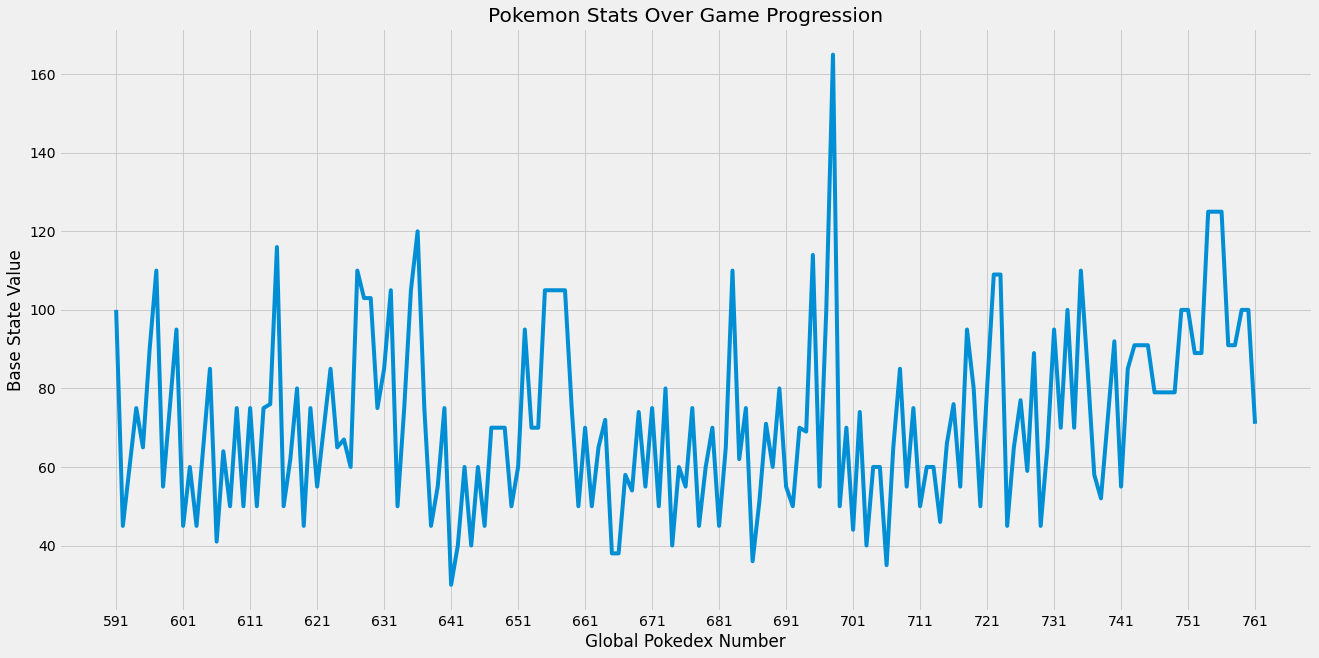

In [16]:
# Code for a visualization - removed by Dr. R

Rather than showing the expected, upward trend, the graph seems to spike erratically. We have a few theories as to why this may be the case. First, while Pokemon are ordered as described above, Pokemon of the same evolutionary line are still grouped together. Since Pokemon in the same evolutionary line get stronger, it makes sense that the amount of health would constantly fluctuate. The other factor to account for is the fact that health is not the only measure of a Pokemon's power, and some Pokemon might have a naturally lower health stat but a higher attack stat.

We also calculated the correlation coefficient to confirm our analyis.

In [17]:
coeff = pokemon_stronger.corr()
coeff

,global_num,hp
global_num,1.000000,0.202037
hp,0.202037,1.000000


As expected, the correlation coefficient (0.202) shows a weak positive linear relationship between Global Number and Health.

At this point in our analysis, we decided to switch our focus towards asking questions about how realistic the design of Pokemon is compared to the real world. We first began by asking a question about in-game stats.

### Q4:  What is the correlation between speed and weight in kg?

It is generally thought that as something gets heavier, it moves slower. Does the same hold for Pokemon?

In [18]:
#select statement here - removed by Dr. R

,name,generation,speed,weight_kg
0,Slowpoke,1,15,36.0
1,Jigglypuff,1,20,5.5
2,Geodude,1,20,20.0
3,Alolan Geodude,1,20,20.3
4,Paras,1,25,5.4
...,...,...,...,...
1003,Zamazenta Hero of Many Battles,8,138,210.0
1004,Dragapult,8,142,50.0
1005,Zacian Crowned Sword,8,148,355.0
1006,Calyrex Shadow Rider,8,150,53.6


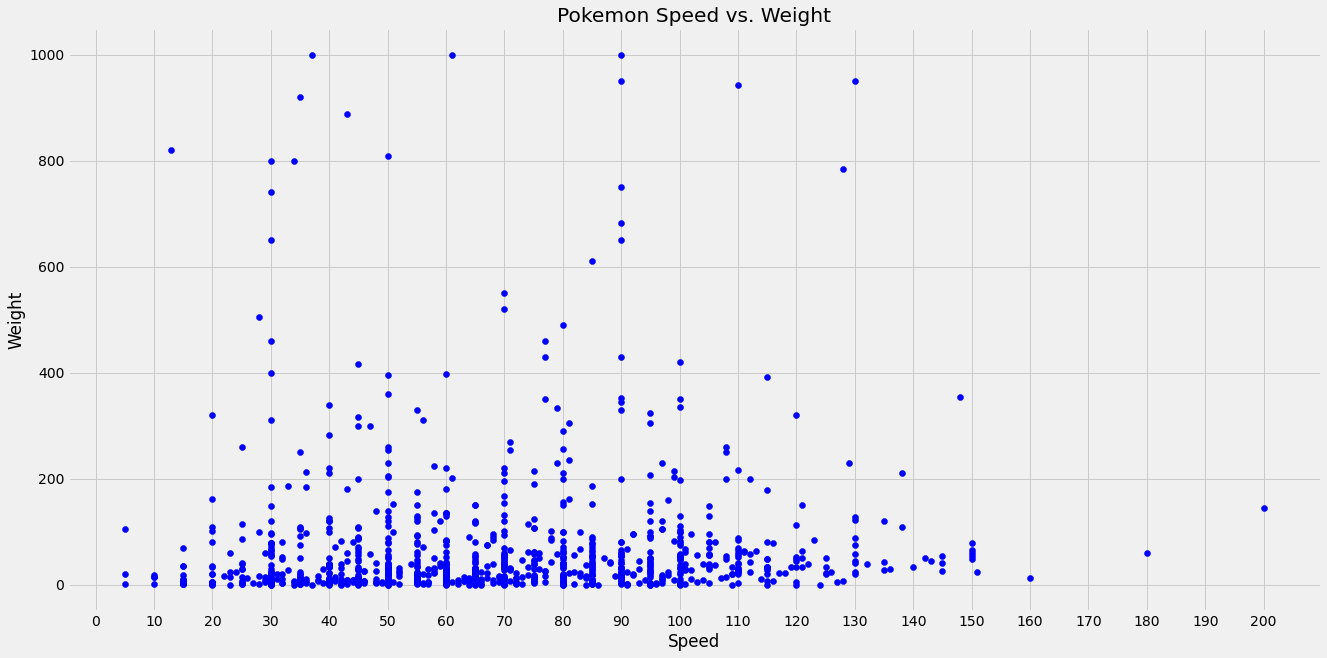

In [19]:
# Code for a visualization - removed by Dr. R

From the scatter plot above, we believe that there is no correlation between a Pokemon's Speed and weight. To confirm our analysis, we calculated the correlation coefficient.

In [20]:
coeff = pokemon_speed_weight.corr()
coeff

,generation,speed,weight_kg
generation,1.000000,-0.007364,0.083836
speed,-0.007364,1.000000,0.048355
weight_kg,0.083836,0.048355,1.000000


The correlation coefficient (0.048) allows us to conclude that there is no linear relationship between a Pokemon's speed and weight.

For our last question, we decided to move away from video game stats and focus on something more tangible. For this, we explored the dog show database to provide a comparison between Pokemon and animals in the real world.

### Q5:  For each Pokemon and dogs of similar height, what is the weight difference between them?

One complaint Pokemon fans sometimes have about the design of new Pokemon is that their size and weight are unrealistic to what is possible with a real world animal. Using the dog show database, we will be comparing the weights of Pokemon to that of dogs of the same average height, and noting those with a difference greater than 11.3kg (roughly 25lbs.).

In [21]:
#select statement here - removed by Dr. R

,pokemon_name,num_dogs,height,weight_diff
0,Kartana,2,0.3,0.1
1,Azelf,2,0.3,0.3
2,Fan Rotom,2,0.3,0.3
3,Frost Rotom,2,0.3,0.3
4,Heat Rotom,2,0.3,0.3
...,...,...,...,...
283,Bulbasaur,2,0.7,52.1
284,Whimsicott,2,0.7,52.4
285,Bellsprout,2,0.7,55.0
286,Misdreavus,2,0.7,58.0


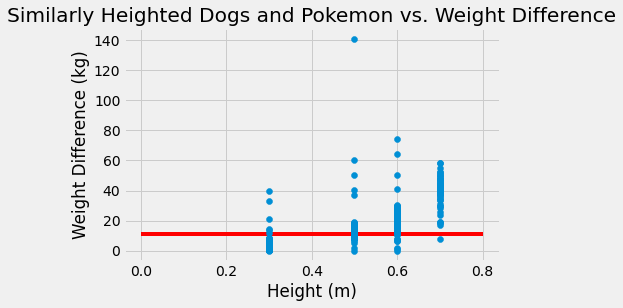

In [22]:
# Code for a visualization - removed by Dr. R

From this data, we notice that the taller a Pokemon or dog is, it appears as if the weight difference increases. Also note that the red line above is at the 11.3kg mark (a weight difference of roughly 25lbs.). To confirm our idea about the upward trend, we calculated the correlation coefficient.

In [23]:
coeff = pokemon_real_comparison.corr()
coeff

,num_dogs,height,weight_diff
num_dogs,1.000000,-0.337329,-0.037100
height,-0.337329,1.000000,0.669726
weight_diff,-0.037100,0.669726,1.000000


The correlation coefficient (0.670) allows us to conclude that there is a moderate positive linear relationship between a Pokemon's height, and the wieght difference between it and dogs of the same height.

In [24]:
conn.close()

---

## Conclusion

Our analysis of this data has shown that there is a surprising amount of complexity to how Pokemon are constructed, both in terms of game statistics and realism. From the questions explored, we have decided that total stats is perhaps the best indicator of a Pokemon's power, whereas data such as height and weight was more or less decided arbitrarily by the game developers rather than by true scientific research. In the future, we would like to consider further evalutations in both of these areas. On the strength side of things, we would like to do an analysis on the other Pokemon types like we did with the Bug Type question. On the realism side, we would like to find a data set that deals with a variety of animal species, so we can conduct a broader analysis that may explain the odd height and weight combinations of some Pokemon.